In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score, precision_recall_curve, precision_score, recall_score
import re

In [82]:
plt.style.use(['science'])

In [83]:
files = {}
for file in sorted(os.listdir("/home/michael/Desktop/test")):
    files[file] = pd.read_csv("/home/michael/Desktop/test/" + file, index_col=None)

In [84]:
vars = ["X_0", "X_1", "X_2", "X_3", "X_4", "X_5", "X_6", "X_7", "X_8"]
vars_confounded = ["X_0", "X_1", "X_2", "X_3", "X_4", "X_5", "X_6", "X_7", "X_8", "X_10"]
ground_truth = [0, 1, 1, 1, 0, 0, 0, 0, 0]
ground_truth_confounded = [0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
named_ground_truth = {
    name: val
    for name, val in zip(vars_confounded, ground_truth_confounded)
}
ground_truth_confounded_df = pd.concat([pd.Series(ground_truth_confounded).to_frame().T] * 30, ignore_index=True, axis=0)
ground_truth_confounded_df.columns = vars_confounded
ground_truth_df = pd.concat([pd.Series(ground_truth).to_frame().T] * 30, ignore_index=True, axis=0)
ground_truth_df.columns = vars

In [85]:
def comp_avg_metric(data, metric=accuracy_score):
    avg = 0

    gt = ground_truth
    gt_df = ground_truth_df
    vals = []
    if len(data.columns) == 10:
        gt = ground_truth_confounded
        gt_df = ground_truth_confounded_df
    for i, row in data.iterrows():
        # print(row)
        vals.append(metric(gt, row))
    mean = np.mean(vals)
    std = np.std(vals)
    
    return {"mean": mean, "std": std}

['2', '4', '8', '16', '32', '64', '128', '256', '512', '1024', '2048', '4096', '8192']


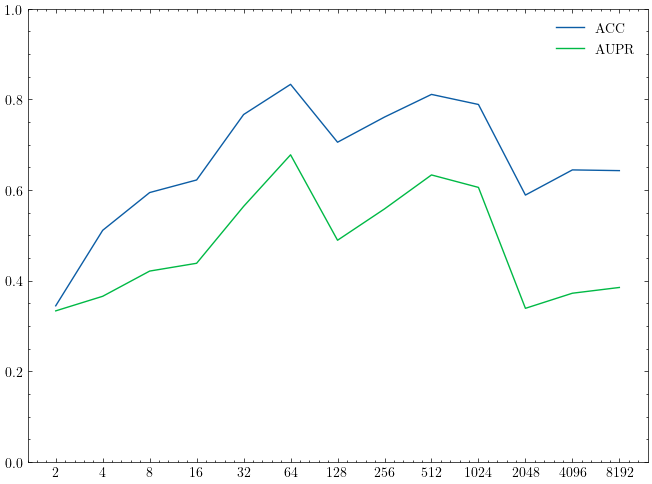

In [86]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
acc={}
aupr={}
for file in files:
    step = int(re.search(r"(?<=step-)\d+", file).group())

    
    acc[step] = comp_avg_metric(files[file].round(), accuracy_score)
    aupr[step] = comp_avg_metric(files[file].round(), average_precision_score)

acc = {x[0]: x[1]["mean"] for x in sorted(acc.items(), key=lambda x: x[0])}
aupr = {x[0]: x[1]["mean"] for x in sorted(aupr.items(), key=lambda x: x[0])}
steps = [str(2**(step)) for step in acc.keys()]
print(steps)
ax.plot(list(acc.keys()), list(acc.values()), label="ACC")
ax.plot(list(aupr.keys()), list(aupr.values()), label="AUPR")
ax.set_xticks(np.arange(1, len(steps)+1))
ax.set_xticklabels(steps)
ax.set_ylim(0, 1)
ax.legend()
plt.show()

In [87]:
files

{'single_samplesizetest_scenario-halflinear_step-10_ss_1024.csv':     X_0   X_1   X_2   X_3   X_4  X_5   X_6   X_7  X_8
 0   0.0  1.00  0.69  0.53  0.48  0.0  0.00  1.00  0.0
 1   0.0  1.00  1.00  1.00  1.00  0.0  0.51  0.00  0.0
 2   0.0  1.00  0.36  0.40  1.00  0.0  0.00  0.00  0.0
 3   0.0  1.00  0.00  0.00  0.08  0.0  0.00  1.00  0.0
 4   0.0  1.00  1.00  1.00  0.00  0.0  1.00  0.00  0.0
 5   0.0  1.00  1.00  1.00  0.00  0.0  0.00  0.00  0.0
 6   0.0  1.00  0.75  0.66  1.00  0.0  0.00  0.00  0.0
 7   0.0  1.00  1.00  1.00  0.73  0.0  0.00  0.00  0.0
 8   0.0  1.00  0.68  0.58  0.47  0.0  0.00  1.00  0.0
 9   0.0  1.00  0.26  0.22  1.00  0.0  0.00  0.46  0.0
 10  0.0  0.99  0.50  0.54  0.00  0.0  1.00  0.00  0.0
 11  0.0  1.00  1.00  1.00  1.00  0.0  0.81  0.00  0.0
 12  0.0  1.00  0.00  0.00  0.00  0.0  0.00  1.00  0.0
 13  0.0  1.00  1.00  1.00  0.00  0.0  0.00  0.00  0.0
 14  0.0  1.00  1.00  1.00  0.00  0.0  0.18  0.00  0.0
 15  0.0  1.00  0.31  0.25  1.00  0.0  0.00  0.00  0.0
